In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random
import feature_finder_keiko as ff
from datetime import datetime
plt.rcParams["figure.figsize"] = (20,10)
import scipy.stats as st
import os
from Data import Data
import pickle
from netCDF4 import Dataset
import itertools
from collections import Counter
from mpl_toolkits.basemap import Basemap
import Rung as rung
plt.rcParams["figure.figsize"] = (20,10)

In [8]:
#This africa spi data 2.5 degree from Keiko 

data = np.load("africa_gamma_18912015_25_12.npy")
df = pd.DataFrame(data)
df = df.interpolate(limit_direction = 'backward')
data = np.array(df)

In [9]:
data.shape

(1128, 635)

In [10]:
np.count_nonzero(np.isnan(data))

0

In [3]:
temporal_limits= {"time_min":datetime(1901, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) }
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',temporal_limits, missing_value=-9.96921e+36)

data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

df = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

In [4]:
df["clusters"] = 0

In [5]:
col_index = np.array([False, False, True])
index = (df.lats > 36) & (df.lons < -0.4).values
df.loc[index, col_index] = np.nan

index = (df.lats > 12) & (df.lons > 44) &(df.lons < 49).values
df.loc[index, col_index] = np.nan

index = (df.lats > 34) & (df.lons > 11.55).values
df.loc[index, col_index] = np.nan

index = (df.lats > 18) & (df.lons > 40).values
df.loc[index, col_index] = np.nan

index = (df.lats > 19) & (df.lons > 38).values
df.loc[index, col_index] = np.nan

index = (df.lats > 24) & (df.lons > 35.5).values
df.loc[index, col_index] = np.nan

index = (df.lats > 15) & (df.lons > 41.5).values
df.loc[index, col_index] = np.nan

index = (df.lats > 13.5) & (df.lons > 43).values
df.loc[index, col_index] = np.nan

index = (df.lats > 27) & (df.lons > 34.97).values
df.loc[index, col_index] = np.nan

index = (df.lats > 27.7) & (df.lons > 33.68).values
df.loc[index, col_index] = np.nan

index = df.clusters == 'nan'
df.loc[index, col_index] = np.nan

In [6]:
I = np.where(~pd.isna(df.clusters.values))[0]

In [7]:
len(I)

511

In [7]:
spatial_limits={"lon_min":-23.75,"lon_max":58.75,"lat_min":-38.75,"lat_max":38.75}
temporal_limits = {"time_min":datetime(1901, 1, 16, 0, 0),"time_max":datetime(2020, 12, 16, 0, 0)}
d = Data('../../../nc/cru_ts4.05.1901.2020.pre.dat.nc','pre',temporal_limits,spatial_limits, missing_value=9.96921e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

index = np.where(result[0,:] != 9.96921e+36)[1]

result = result[:,index]
lon_list = np.array(lon_list)[index]
lat_list = np.array(lat_list)[index]

In [6]:
result.shape

(1440, 12952)

In [ ]:
for i in range(len(a)):
    if np.isnan(a[i]):
        if i==0:
            start = 0
        else:
            start = a[i-1]        
        j = 0
        while np.isnan(a[i+j+1]):
            j += 1
        end = a[i+j+1]
        inc = (end - start)/(j+2)
        for k in range(j):
            a[i+k] = start + (k+1)*inc

In [179]:
d = np.load("../../npy_files/africa_gamma_18912015_25_12.npy")

In [180]:
df = pd.DataFrame(d)

In [181]:
df.shape

(1128, 635)

In [182]:
df.shape

(1128, 635)

In [10]:
df = pd.read_csv("Africa_gamma_19012020_12.csv", header=None)

In [8]:
df = df.T

In [11]:
df.shape

(1069, 12952)

In [12]:
I = np.load("af_index.npy")

In [13]:
df = df.interpolate(limit_direction = 'backward')

In [14]:
data = np.array(df)

In [15]:
data.shape

(1069, 12952)

In [16]:
data = data[:,I]

In [17]:
np.count_nonzero(np.isnan(data))

217223

In [27]:
np.save("../../npy_files/africa_gamma_18912015_25_12_clean.npy", data)

In [136]:
lons = sorted(set(df_af["lons"].values))
lats = sorted(set(df_af["lats"].values))
lons = np.array(lons)
lats = np.array(lats)

In [129]:
def drougth_counter(d, level = -1):
    level = -1
    N = 0
    in_drought = False
    for i in range(1,len(d)):
        if d[i-1] > level and d[i] <= level and not in_drought:
            N = N+1
            in_drought = True
        if in_drought and d[i-1] < 0 and d[i] >= 0:
            in_drought = False
    return(N)

In [130]:
result = []
for j in range(data.shape[1]):
    result.append(drougth_counter(data[:,j]))

In [131]:
df_af["clusters"] = result

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
deg = np.zeros((len(lats),len(lons)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_af[(df_af.lats == lats[i]) & (df_af.lons == lons[j])].clusters.values.size == 0:
            deg[i,j] = df_af[(df_af.lats == lats[i]) & (df_af.lons == lons[j])].clusters.values
           # if df_af[(df_af.lats == lat[i]) & (df_af.lons == lon[j])].clusters.values == 1:
           #     deg[i,j] = 1
           # else:
           #     deg[i,j] = np.nan
        else:
            deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


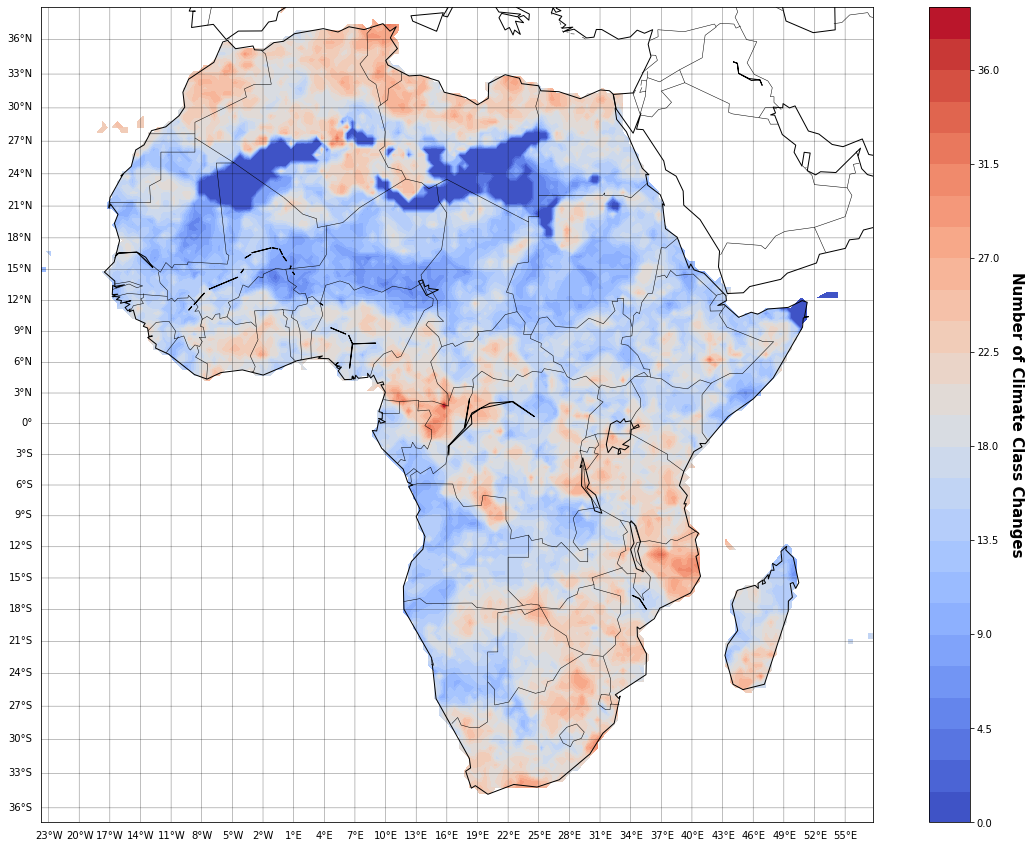

In [139]:
m=Basemap(projection='mill',lat_ts=50,llcrnrlon=lons.min(), \
  urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
  resolution='c')
#m = Basemap(projection='ortho',lat_0=0,lon_0=-180,resolution='l')

lon2, lat2 = np.meshgrid(lons,lats)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcoastlines()
m.drawcountries()
cs = m.contourf(x,y,deg,25,cmap=plt.cm.get_cmap('coolwarm'))
#plt.colorbar()
cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['0', '5', '10'])
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(0, 11, 1)], fontsize=12)
cbar.set_label('Number of Climate Class Changes', rotation=270,labelpad=25, size=15,weight='bold')
#plt.title(' EOF {}'.format(pc), fontsize = 20)
#plt.savefig("NumberClimateClassChanges.png")

In [171]:
df = pd.DataFrame(data)

In [172]:
df = df.interpolate()

data = np.array(df)

In [2]:
spatial_limits={"lon_min":-23.75,"lon_max":58.75,"lat_min":-38.75,"lat_max":38.75}
temporal_limits = {"time_min":datetime(1901, 1, 16, 0, 0),"time_max":datetime(2020, 12, 16, 0, 0)}
d = Data('../../../nc/cru_ts4.05.1901.2020.pre.dat.nc','pre',temporal_limits,spatial_limits, missing_value=9.96921e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

index = np.where(result[0,:] != 9.96921e+36)[1]

result = result[:,index]
lon_list = np.array(lon_list)[index]
lat_list = np.array(lat_list)[index]

df = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

In [3]:
df["clusters"] = 0

In [4]:
I = np.load("af_index.npy")
df_af = df.iloc[I,:]

In [5]:
data = np.load("../../npy_files/africa_gamma_18912015_25_12_clean_1.npy")

In [6]:
data = data/data.std(0)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [7]:
data[np.where(np.isnan(data))] = 0

In [8]:
V, U, S, ts, eig, explained, max_comps = rung.pca_svd(data,truncate_by='max_comps', max_comps=50)

In [9]:
Vr, Rot = rung.varimax(V)
Vr = rung.svd_flip(Vr)

In [10]:
comps_ts = np.matmul(np.array(data),V)

In [11]:
pc=1
df_af["clusters"] = V[:,pc-1]

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
lons = sorted(set(df_af["lons"].values))
lats = sorted(set(df_af["lats"].values))
lons = np.array(lons)
lats = np.array(lats)

In [13]:
deg = np.zeros((len(lats),len(lons)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_af[(df_af.lats == lats[i]) & (df_af.lons == lons[j])].clusters.values.size == 0:
            deg[i,j] = df_af[(df_af.lats == lats[i]) & (df_af.lons == lons[j])].clusters.values
           # if df_af[(df_af.lats == lat[i]) & (df_af.lons == lon[j])].clusters.values == 1:
           #     deg[i,j] = 1
           # else:
           #     deg[i,j] = np.nan
        else:
            deg[i,j]=np.nan

In [14]:
if np.nanmax(deg) > 0 and np.nanmax(deg) > abs(np.nanmin(deg)):
    vmin = -np.nanmax(deg)
    vmax = np.nanmax(deg)
elif np.nanmin(deg) < 0 and np.nanmax(deg) < abs(np.nanmin(deg)):
    vmin = np.nanmin(deg)
    vmax = -np.nanmin(deg)
elif np.nanmax(deg) > 0 and np.nanmin(deg) > 0:
    vmin = 0
    vmax = np.nanmax(deg)
elif np.nanmax(deg) < 0 and np.nanmin(deg) < 0:
    vmin = np.nanmin(deg)
    vmax = 0

In [15]:
deg = deg*100

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


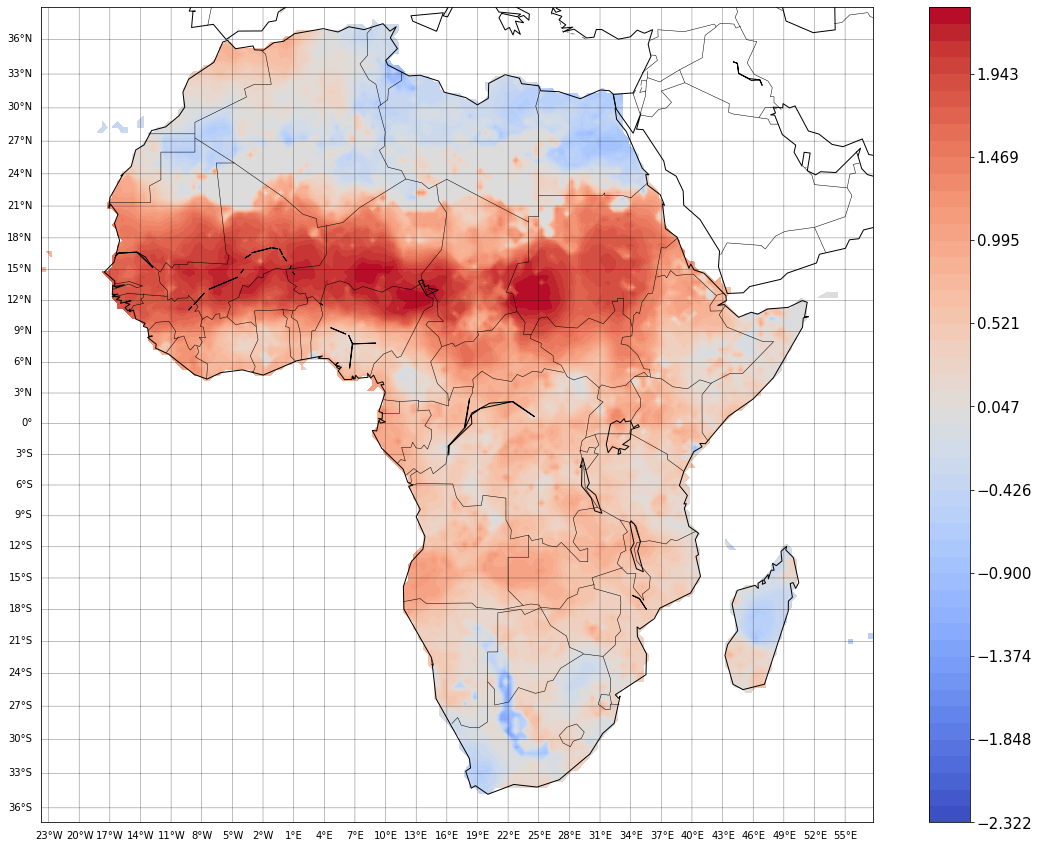

In [34]:
m=Basemap(projection='mill',lat_ts=50,llcrnrlon=lons.min(), \
  urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
  resolution='c')
#m = Basemap(projection='ortho',lat_0=0,lon_0=-180,resolution='l')

lon2, lat2 = np.meshgrid(lons,lats)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcoastlines()
m.drawcountries()
levels = np.linspace(vmin, vmax)
cs = m.contourf(x,y,deg1,25,levels = levels,cmap=plt.cm.get_cmap('coolwarm'))
#plt.colorbar()
cbar = plt.colorbar();
#cbar.set_label('Climate Velocity', rotation=270,labelpad=33, size=30,weight='bold')
cbar.ax.tick_params(labelsize=15)
#cbar.ax.set_yticklabels(['0', '5', '10'])
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(0, 11, 1)], fontsize=12)
#cbar.set_label('Number of Climate Class Changes', rotation=270,labelpad=25, size=15,weight='bold')
#plt.title(' EOF {}'.format(pc), fontsize = 30)
plt.savefig("SpiEOF{}.png".format(pc))

No handles with labels found to put in legend.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


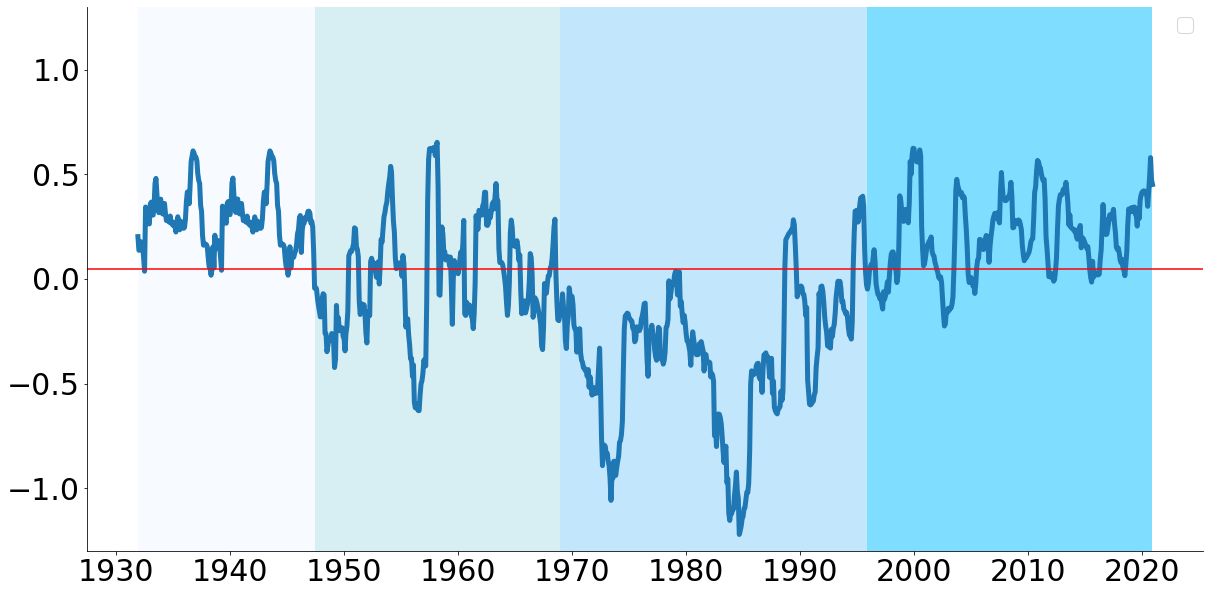

In [54]:
PC = comps_ts[:,pc-1]
x = np.arange('1931-12', '2021-01', dtype='datetime64[M]')
#x = np.arange('1976-01', '2011-01', dtype='datetime64[M]')
plt.plot(x, PC/100, linewidth=5)
#plt.plot(x, dmi, label = "DMI", linewidth=4)
#plt.ylabel("Temperature (c)", fontsize = 25)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(fontsize = 20)
plt.axhline(0.05, color = 'r')
#plt.title(' PC {}'.format(pc), fontsize = 30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
axes.set_ylim([-1.3,1.3])

plt.axvspan('1931-12', '1947-06', facecolor='#F0F8FF', alpha=0.5)
plt.axvspan('1947-06', '1968-12', facecolor='#B0E0E6', alpha=0.5)
plt.axvspan('1968-12', '1995-12', facecolor='#87CEFA', alpha=0.5)
plt.axvspan('1995-12', '2020-12', facecolor='#00BFFF', alpha=0.5)



#plt.axvspan('1984-12', '2001-12', facecolor='#C0C0C0', alpha=0.5)
#plt.axvspan('2001-12', '2020-12', facecolor='#A9A9A9', alpha=0.5)

#plt.savefig("SST_PC_{}-{}_{}.png".format(pc,train_start,validation_end))
plt.savefig("SpiPC{}.png".format(pc))


#plt.savefig("SST_PC_{}-{}_{}.png".format(pc,train_start,validation_end))
#plt.savefig("SpiPC{}.png".format(pc))

In [20]:
x

array(['1931-12', '1932-01', '1932-02', ..., '2020-10', '2020-11',
       '2020-12'], dtype='datetime64[M]')

No handles with labels found to put in legend.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


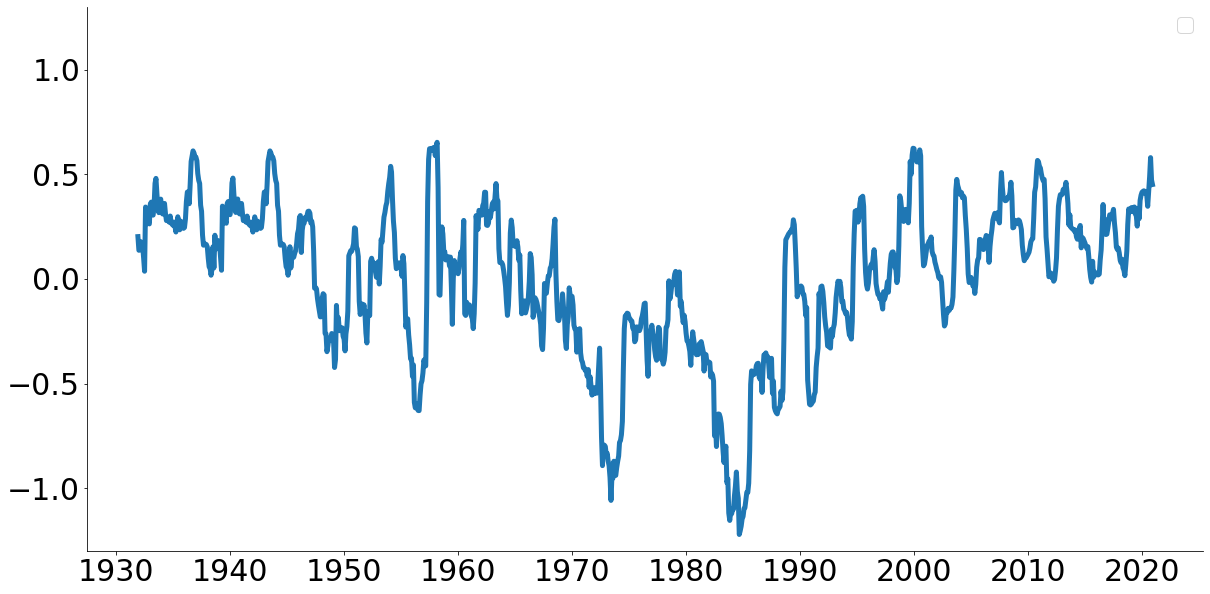

In [33]:
PC = comps_ts[:,pc-1]
x = np.arange('1931-12', '2021-01', dtype='datetime64[M]')
#x = np.arange('1976-01', '2011-01', dtype='datetime64[M]')
plt.plot(x, PC/100, linewidth=5)
#plt.plot(x, dmi, label = "DMI", linewidth=4)
#plt.ylabel("Temperature (c)", fontsize = 25)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(fontsize = 20)
#plt.axhline(0.05, color = 'r')
#plt.title(' PC {}'.format(pc), fontsize = 30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
axes.set_ylim([-1.3,1.3])
#plt.savefig("SST_PC_{}-{}_{}.png".format(pc,train_start,validation_end))
plt.savefig("SpiPC{}.png".format(pc))

In [50]:
velocity_af = np.load("velocity_af_h.npy")
I_af = np.load("velocity_af_I.npy")

In [51]:
corr, p = st.pearsonr(velocity_af[I_af],df_af["clusters"].values[I_af])

In [52]:
print(corr)

0.5960966081044012


In [53]:
print(p)

0.0


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


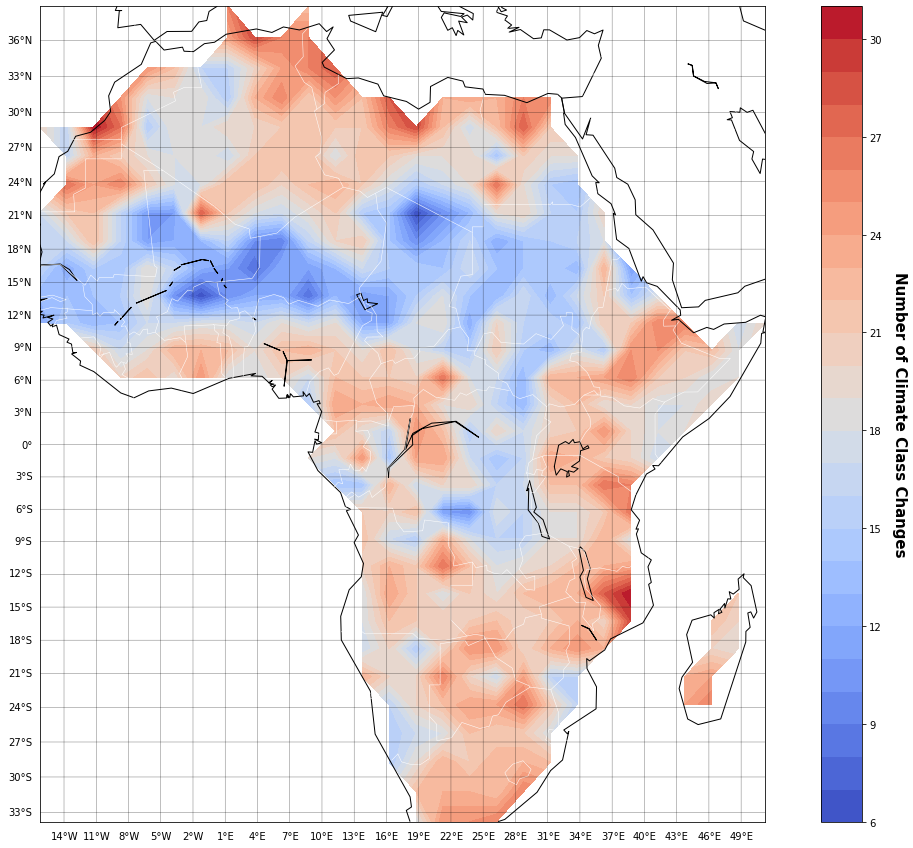

In [57]:
m=Basemap(projection='mill',lat_ts=50,llcrnrlon=lons.min(), \
  urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
  resolution='c')
#m = Basemap(projection='ortho',lat_0=0,lon_0=-180,resolution='l')

lon2, lat2 = np.meshgrid(lons,lats)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcoastlines()
m.drawcountries(color='white')
cs = m.contourf(x,y,deg,25,cmap=plt.cm.get_cmap('coolwarm'))
#plt.colorbar()
cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['0', '5', '10'])
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(0, 11, 1)], fontsize=12)
cbar.set_label('Number of Climate Class Changes', rotation=270,labelpad=25, size=15,weight='bold')
#plt.title(' EOF {}'.format(pc), fontsize = 20)
#plt.savefig("NumberClimateClassChanges.png")

In [285]:
start_year = 1922
end_year=2015
base_year = 1922

In [ ]:
start_index = (start_year - base_year) * 12
end_index = start_index + (end_year - (start_year - 1))*12

In [336]:
N = data.shape[0]
count = []
for i in range(N):
    count.append(np.count_nonzero(data[i,:] <= -1))
    #count.append(np.count_nonzero(np.logical_and(data[i,:] > -2, data[i,:] <= -1.5)))
    #count.append(np.count_nonzero(np.logical_and(data[i,:] > -1.5, data[i,:] <= -1)))

In [313]:
moderate = count

In [ ]:
def drought_timeseries(file_name, start_year = 1922, end_year=2015, extremes_treshold = -1, base_year = 1922):

    ET_gamma = np.load(file_name)

    count_detrend = signal.detrend(count[start_index:end_index])
    return(count[start_index:end_index], count_detrend)

In [292]:
data[i,:] > -2 & data[i,:]>=-1.5

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [294]:
np.count_nonzero(np.logical_and(data[i,:] > -2, data[i,:] <= -1.5))

20

In [308]:
severe

[]

In [12]:
spi, _ = ff.drought_timeseries("../../npy_files/africa_gamma_18912015_25_12.npy", extremes_treshold=-1)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


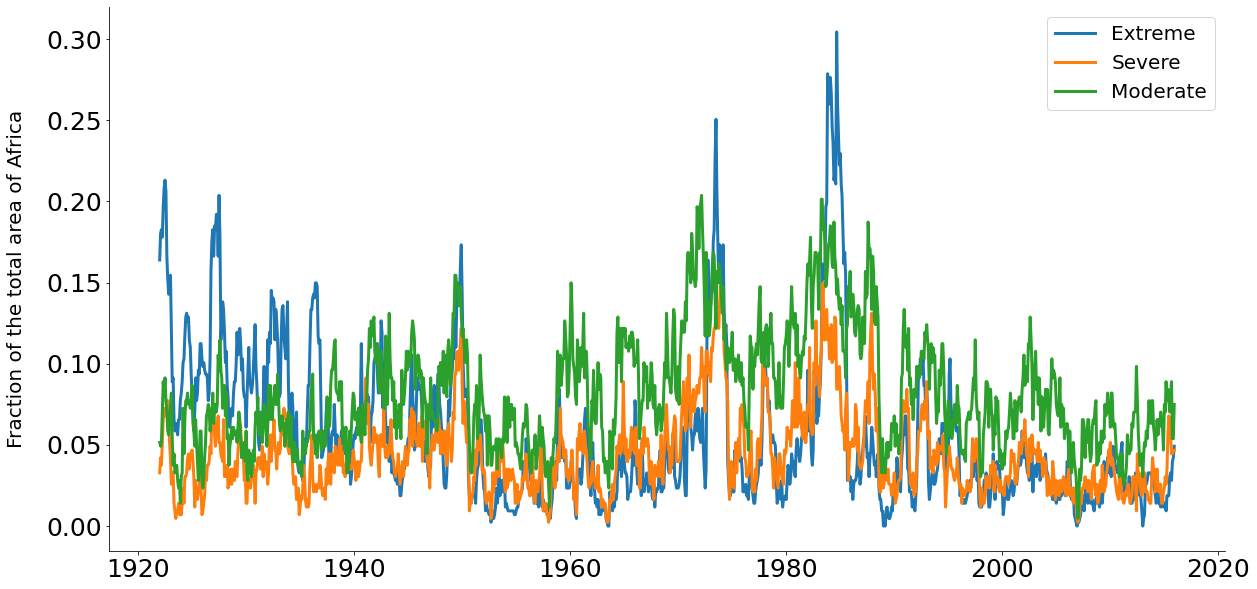

In [335]:
x = np.arange('1922-01', '2016-01', dtype='datetime64[M]')
plt.plot(x,np.array(extreme)/427, label = 'Extreme',linewidth = 3)
plt.plot(x,np.array(severe)/427, label = 'Severe',linewidth = 3)
plt.plot(x,np.array(moderate)/427, label = 'Moderate',linewidth = 3)
plt.legend(fontsize = 20)
#plt.axhline(0.0, color = 'r',linewidth = 2)
#plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("Fraction of the total area of Africa", fontsize = 20,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25);

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
plt.savefig("drought_frac.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


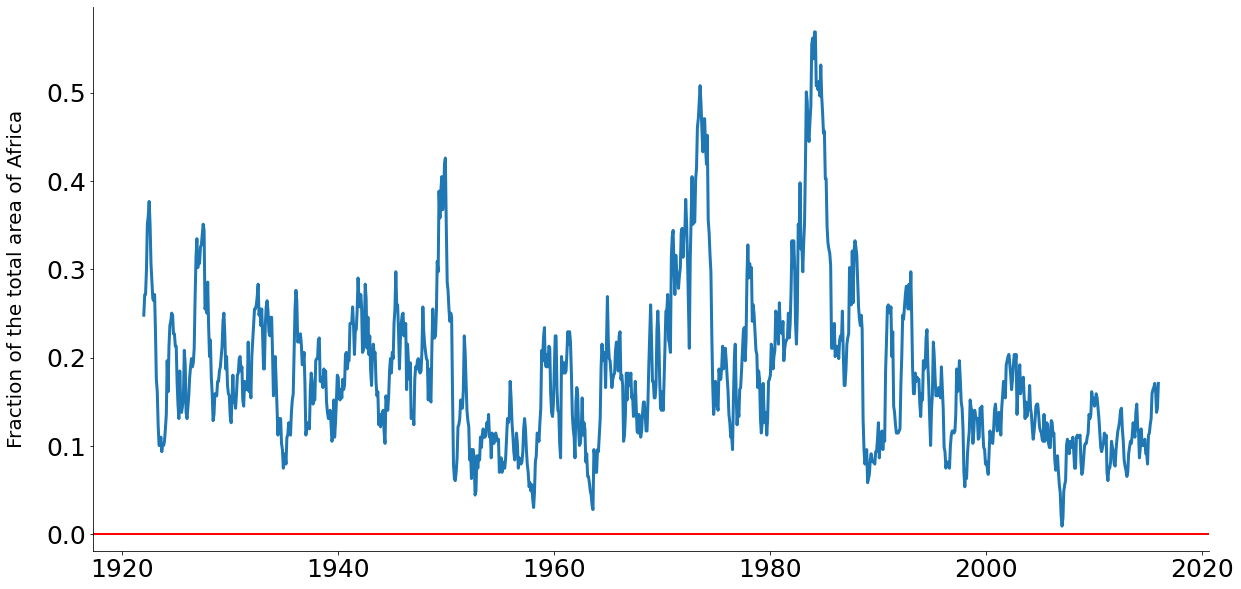

In [339]:
x = np.arange('1922-01', '2016-01', dtype='datetime64[M]')
plt.plot(x,np.array(count)/427, label = 'Extreme',linewidth = 3)
#plt.plot(x,np.array(severe)/427, label = 'Severe',linewidth = 3)
#plt.plot(x,np.array(moderate)/427, label = 'Moderate',linewidth = 3)
#plt.legend(fontsize = 20)
plt.axhline(0.0, color = 'r',linewidth = 2)
#plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("Fraction of the total area of Africa", fontsize = 20,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25);

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
plt.savefig("drought_frac_total.png");

In [3]:
class_list = np.load("Africa_class_list.npy")

In [5]:
len(class_list)

635

In [5]:
np.count_nonzero(class_list == "Aw")

113

In [5]:
temporal_limits= {"time_min":datetime(1901, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) }
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',temporal_limits, missing_value=-9.96921e+36)

data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [9]:
data.shape

(1380, 635)

In [270]:
data_af = data[:,I]

In [271]:
data_af.shape

(1380, 427)

In [8]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

class_dic = load_obj("class_dic")

class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)
class_list = np.array(class_list)

In [15]:
class_list = class_list[I]

In [17]:
len(class_list)

511

In [18]:
c = np.load("Africa_class_list.npy")

In [21]:
len(class_list)

511

In [22]:
np.save("AF_class_list.npy",class_list)

In [33]:
np.save("AF_class_list_major.npy",major)

In [31]:
major = []
for i in range(len(class_list)):
    major.append(class_list[i][0])

In [16]:
c = Counter(class_list )
most_common = c.most_common()

most_common

[('BWh', 168),
 ('Aw', 113),
 ('nan', 84),
 ('BSh', 68),
 ('Cwa', 16),
 ('Am', 12),
 ('BSk', 10),
 ('Csa', 9),
 ('Af', 7),
 ('Cwb', 7),
 ('BWk', 5),
 ('As', 4),
 ('Cfb', 4),
 ('Cfa', 3),
 ('Csb', 1)]

In [31]:
df = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

In [36]:
df["clusters"] = 1

col_index = np.array([False, False, True])
index = (df.lats > 36) & (df.lons < -0.4).values
df.loc[index, col_index] = np.nan

index = (df.lats > 12) & (df.lons > 44) &(df.lons < 49).values
df.loc[index, col_index] = np.nan

index = (df.lats > 34) & (df.lons > 11.55).values
df.loc[index, col_index] = np.nan

index = (df.lats > 18) & (df.lons > 40).values
df.loc[index, col_index] = np.nan

index = (df.lats > 19) & (df.lons > 38).values
df.loc[index, col_index] = np.nan

index = (df.lats > 24) & (df.lons > 35.5).values
df.loc[index, col_index] = np.nan

index = (df.lats > 15) & (df.lons > 41.5).values
df.loc[index, col_index] = np.nan

index = (df.lats > 13.5) & (df.lons > 43).values
df.loc[index, col_index] = np.nan

index = (df.lats > 27) & (df.lons > 34.97).values
df.loc[index, col_index] = np.nan

index = (df.lats > 27.7) & (df.lons > 33.68).values
df.loc[index, col_index] = np.nan

index = df.clusters == 'nan'
df.loc[index, col_index] = np.nan

In [38]:
I = np.where(~pd.isna(df.clusters.values))[0]

df_af = df.iloc[I,:]

#class_list_af = class_list[I]

In [39]:
df_af.shape

(511, 3)

In [43]:
df_af["clusters"] = major

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
class_list_major = major

In [46]:
major = np.array(major)

In [49]:
np.count_nonzero(major == 'A')

136

In [76]:
index = np.where(major == 'A')[0]

In [77]:
np.save("A_index.npy", index)

In [17]:
A_index = np.load("A_index.npy")
B_index = np.load("B_index.npy")
C_index = np.load("C_index.npy")

In [18]:
I = np.load("af_index_2.5.npy")

In [32]:
df_af = df.iloc[I,:]

In [33]:
df_af["clusters"] = 'n'

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_af.iloc[B_index,:]

,lons,lats,clusters
9,-16.25,21.25,B
10,-16.25,18.75,B
11,-16.25,16.25,B
12,-16.25,13.75,B
14,-13.75,28.75,B
...,...,...,...
549,46.25,3.75,B
570,48.75,11.25,B
571,48.75,8.75,B
572,48.75,6.25,B


In [43]:
class_list_major  =['A','B','C']

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


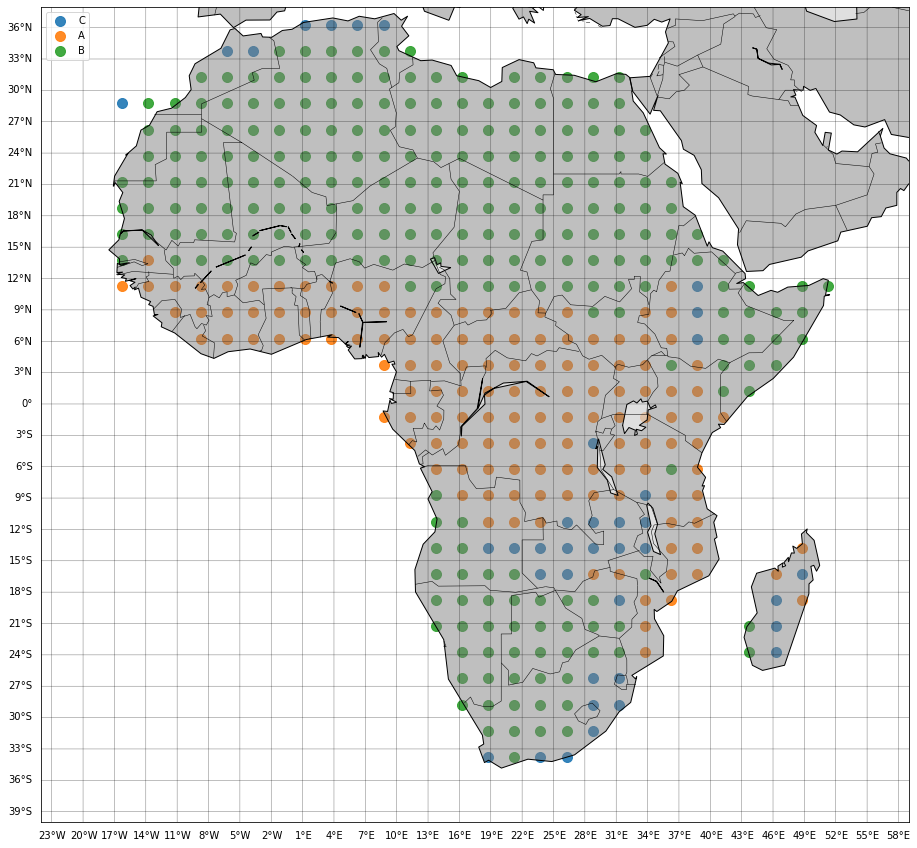

In [44]:
df_list = []
for j in range(len(set(class_list_major))):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=59,urcrnrlat=38)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcoastlines()
m.drawcountries()
#colors = pf.random_color_1(n_components)


i = 0
for j in set(class_list_major):
    values = df_af["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df_af.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=100, label = j)
    i+=1
    
    
plt.legend()
#plt.savefig("6_Clusters_non_standard.png")
plt.show()

In [52]:
c = Counter(class_list_major)
most_common = c.most_common()

most_common

[('B', 251), ('A', 136), ('C', 40)]

In [42]:
class_list_major = []
for i in range(len(class_list_af)):
    class_list_major.append(class_list_af[i][0])

In [46]:
df_af["clusters"] = class_list_major

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
np.array(class_list_major) == 'A'

array(['C', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A',
       'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'A', 'A', 'A', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'A', 'A', 'C', 'C', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

# Souther part of Africa

In [132]:
# south  "lat_min":-6.25,"lat_max":-38.75
# center "lat_min":12.25,"lat_max":-6.25
# north "lat_min":37.75,"lat_max":12.25

In [35]:
temporal_limits= {"time_min":datetime(1891, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) }
spatial_limits={"lon_min":336.25,"lon_max":58.75,"lat_min":37.75,"lat_max":-38.75}


d = Data("../../../nc/GPCC_half.nc",'precip',temporal_limits,spatial_limits=spatial_limits, missing_value=-9.96921e+36)

data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [36]:
lat

array([ 37.75,  37.25,  36.75,  36.25,  35.75,  35.25,  34.75,  34.25,
        33.75,  33.25,  32.75,  32.25,  31.75,  31.25,  30.75,  30.25,
        29.75,  29.25,  28.75,  28.25,  27.75,  27.25,  26.75,  26.25,
        25.75,  25.25,  24.75,  24.25,  23.75,  23.25,  22.75,  22.25,
        21.75,  21.25,  20.75,  20.25,  19.75,  19.25,  18.75,  18.25,
        17.75,  17.25,  16.75,  16.25,  15.75,  15.25,  14.75,  14.25,
        13.75,  13.25,  12.75,  12.25,  11.75,  11.25,  10.75,  10.25,
         9.75,   9.25,   8.75,   8.25,   7.75,   7.25,   6.75,   6.25,
         5.75,   5.25,   4.75,   4.25,   3.75,   3.25,   2.75,   2.25,
         1.75,   1.25,   0.75,   0.25,  -0.25,  -0.75,  -1.25,  -1.75,
        -2.25,  -2.75,  -3.25,  -3.75,  -4.25,  -4.75,  -5.25,  -5.75,
        -6.25,  -6.75,  -7.25,  -7.75,  -8.25,  -8.75,  -9.25,  -9.75,
       -10.25, -10.75, -11.25, -11.75, -12.25, -12.75, -13.25, -13.75,
       -14.25, -14.75, -15.25, -15.75, -16.25, -16.75, -17.25, -17.75,
      

In [37]:
lon

array([3.3625e+02, 3.3675e+02, 3.3725e+02, 3.3775e+02, 3.3825e+02,
       3.3875e+02, 3.3925e+02, 3.3975e+02, 3.4025e+02, 3.4075e+02,
       3.4125e+02, 3.4175e+02, 3.4225e+02, 3.4275e+02, 3.4325e+02,
       3.4375e+02, 3.4425e+02, 3.4475e+02, 3.4525e+02, 3.4575e+02,
       3.4625e+02, 3.4675e+02, 3.4725e+02, 3.4775e+02, 3.4825e+02,
       3.4875e+02, 3.4925e+02, 3.4975e+02, 3.5025e+02, 3.5075e+02,
       3.5125e+02, 3.5175e+02, 3.5225e+02, 3.5275e+02, 3.5325e+02,
       3.5375e+02, 3.5425e+02, 3.5475e+02, 3.5525e+02, 3.5575e+02,
       3.5625e+02, 3.5675e+02, 3.5725e+02, 3.5775e+02, 3.5825e+02,
       3.5875e+02, 3.5925e+02, 3.5975e+02, 2.5000e-01, 7.5000e-01,
       1.2500e+00, 1.7500e+00, 2.2500e+00, 2.7500e+00, 3.2500e+00,
       3.7500e+00, 4.2500e+00, 4.7500e+00, 5.2500e+00, 5.7500e+00,
       6.2500e+00, 6.7500e+00, 7.2500e+00, 7.7500e+00, 8.2500e+00,
       8.7500e+00, 9.2500e+00, 9.7500e+00, 1.0250e+01, 1.0750e+01,
       1.1250e+01, 1.1750e+01, 1.2250e+01, 1.2750e+01, 1.3250e

In [164]:
data.shape

(1500, 6679)

In [117]:
np.save("africa_north.npy", data)

In [38]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

In [39]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)

In [120]:
np.save("North_class_list.npy", class_list)

In [40]:
c = Counter(class_list)

#n_most_common = 3
most_common = c.most_common

In [42]:
most_common()

[('BWh', 5499),
 ('Aw', 2776),
 ('BSh', 1792),
 ('Csa', 483),
 ('Am', 409),
 ('Cwa', 393),
 ('BSk', 350),
 (nan, 225),
 ('BWk', 207),
 ('Af', 205),
 ('Cwb', 189),
 ('Cfb', 137),
 ('As', 96),
 ('Cfa', 65),
 ('Dsa', 43),
 ('Csb', 41),
 ('Dsb', 18)]

In [ ]:
['BWh','Aw','BSh','Csa','Am','Cwa','BSk','BWk','Af']

In [ ]:
 ['Am','Cwa','BSk','BWk','Af','Cwb','Cfb','As','Cfa','Csb','Csa']

In [32]:
index = np.random.choice(389, 40, replace=False)

In [33]:
np.save("Cwa_index.npy",index)

In [34]:
index

array([ 77, 146,  59,  97, 282, 337,  20, 271,  81, 183, 334,  17, 149,
       160, 195, 235, 267, 177, 180, 314, 175, 188, 200, 165, 173, 278,
         1, 293, 373, 245, 268, 297, 118,   8,   5, 328, 366,  23, 265,
       144])

In [178]:
#north
most_common()

[('BWh', 5499),
 ('Aw', 2776),
 ('BSh', 1792),
 ('Csa', 483),
 ('Am', 409),
 ('Cwa', 393),
 ('BSk', 350),
 (nan, 225),
 ('BWk', 207),
 ('Af', 205),
 ('Cwb', 189),
 ('Cfb', 137),
 ('As', 96),
 ('Cfa', 65),
 ('Dsa', 43),
 ('Csb', 41),
 ('Dsb', 18)]

In [92]:
#center
most_common()

[('Aw', 1993),
 ('BSh', 625),
 ('Am', 369),
 ('BWh', 223),
 ('Af', 169),
 ('As', 89),
 ('Cwb', 80),
 ('Cfb', 63),
 (nan, 36),
 ('Cwa', 3),
 ('Csb', 2)]

In [126]:
#south
most_common()

[('Aw', 856),
 ('BSh', 728),
 ('Cwa', 389),
 ('BWh', 235),
 ('BWk', 117),
 ('BSk', 110),
 ('Cwb', 108),
 ('Cfb', 74),
 ('Cfa', 64),
 ('nan', 58),
 ('Am', 42),
 ('Af', 36),
 ('Csb', 11),
 ('As', 7),
 ('Csa', 5)]

In [49]:
class_name = "BWh"
index = (np.array(class_list) == class_name)
np.save("{}.npy".format(class_name), data[:,index])

In [48]:
np.save("{}.npy".format(class_name), data[:,index])

In [54]:
np.count_nonzero(np.isnan(data[:,index]))

0

In [4]:
d = Data("../../../nc/GPCC_half.nc",'precip',missing_value=-9.96921e+36)

In [5]:
data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [6]:
data.shape

(1512, 13129)

In [15]:
lat

array([ 38.75,  38.25,  37.75,  37.25,  36.75,  36.25,  35.75,  35.25,
        34.75,  34.25,  33.75,  33.25,  32.75,  32.25,  31.75,  31.25,
        30.75,  30.25,  29.75,  29.25,  28.75,  28.25,  27.75,  27.25,
        26.75,  26.25,  25.75,  25.25,  24.75,  24.25,  23.75,  23.25,
        22.75,  22.25,  21.75,  21.25,  20.75,  20.25,  19.75,  19.25,
        18.75,  18.25,  17.75,  17.25,  16.75,  16.25,  15.75,  15.25,
        14.75,  14.25,  13.75,  13.25,  12.75,  12.25,  11.75,  11.25,
        10.75,  10.25,   9.75,   9.25,   8.75,   8.25,   7.75,   7.25,
         6.75,   6.25,   5.75,   5.25,   4.75,   4.25,   3.75,   3.25,
         2.75,   2.25,   1.75,   1.25,   0.75,   0.25,  -0.25,  -0.75,
        -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,  -4.25,  -4.75,
        -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,  -8.25,  -8.75,
        -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75, -12.25, -12.75,
       -13.25, -13.75, -14.25, -14.75, -15.25, -15.75, -16.25, -16.75,
      

In [13]:
lon[0]

336.25

In [14]:
lon[-1]

58.75

In [21]:
lat

array([ 39.75,  39.25,  38.75,  38.25,  37.75,  37.25,  36.75,  36.25,
        35.75,  35.25,  34.75,  34.25,  33.75,  33.25,  32.75,  32.25,
        31.75,  31.25,  30.75,  30.25,  29.75,  29.25,  28.75,  28.25,
        27.75,  27.25,  26.75,  26.25,  25.75,  25.25,  24.75,  24.25,
        23.75,  23.25,  22.75,  22.25,  21.75,  21.25,  20.75,  20.25,
        19.75,  19.25,  18.75,  18.25,  17.75,  17.25,  16.75,  16.25,
        15.75,  15.25,  14.75,  14.25,  13.75,  13.25,  12.75,  12.25,
        11.75,  11.25,  10.75,  10.25,   9.75,   9.25,   8.75,   8.25,
         7.75,   7.25,   6.75,   6.25,   5.75,   5.25,   4.75,   4.25,
         3.75,   3.25,   2.75,   2.25,   1.75,   1.25,   0.75,   0.25,
        -0.25,  -0.75,  -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,
        -4.25,  -4.75,  -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,
        -8.25,  -8.75,  -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75,
       -12.25, -12.75, -13.25, -13.75, -14.25, -14.75, -15.25, -15.75,
      

In [4]:
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',missing_value=-9.96921e+36)

In [8]:
data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [9]:
data.shape

(1500, 635)

In [24]:
336.25 - 360

-23.75

In [6]:
lon

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [7]:
lat

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [9]:
data.shape

(1500, 635)

In [10]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)

In [13]:
class_list = np.array(class_list)

In [14]:
np.count_nonzero(class_list == "Aw")

113

In [30]:
lon

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [31]:
lat

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [14]:
lon_list

[336.25,
 336.25,
 341.25,
 341.25,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 343.75,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 346.25,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 348.75,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 351.25,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 353.75,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 356.25,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 358.75,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 3.75,
 3.75,
 3.75,

In [10]:
e = Dataset("../../../nc/GPCC_africa_2.5.nc")

In [11]:
e.variables['lon'][:]

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [12]:
e.variables['lat'][:]

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [4]:
d = Dataset("../../../nc/precipitation.nc")

In [5]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Thu May  2 12:34:08 2019: ncrcat -O -n 1,3,1 /httpd/psd/tmp/ot.X179.234.183.17.121.12.34.8.nc.001.nc /Public/www/X179.234.183.17.121.12.34.8.nc
Thu May  2 12:34:08 2019: ncks -a -O -d lat,-40.750000,40.750000 -d lon,334.750000,60.750000 -d time,660,1500 /Datasets/gpcc/full_v2018/precip.mon.total.2.5x2.5.v2018.nc /httpd/psd/tmp/ot.X179.234.183.17.121.12.34.8.nc.001.nc
Created 09/2018  based on V2018 data obtained via ftp
    title: GPCC Full Data Reanalysis Version 2018 2.5x2.5 Monthly Total
    Conventions: CF 1.0
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.gpcc.html
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.

In [6]:
d.variables['lon'][:]

array([336.25, 338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75,
       356.25, 358.75,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
        36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,  53.75,
        56.25,  58.75], dtype=float32)

In [7]:
d.variables['lat'][:]

array([ 38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,  21.25,
        18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75,
       -21.25, -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75],
      dtype=float32)

In [11]:
336.25-360

-23.75

In [5]:
c = Dataset('../../../nc/air_monthly_mean_africa_half.nc')

In [6]:
c

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions: CF-1.0
    Source: http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GHCN_CAMS/.gridded/.deg0p5/
    version: 3.01
    history: Mon Jul 19 03:08:21 2021: ncrcat -O -n 1,3,1 /httpd/psd/tmp/ot.X188.229.17.98.199.3.8.16.nc.001.nc /Public/www/X188.229.17.98.199.3.8.16.nc
Mon Jul 19 03:08:17 2021: ncks -a -O -d lat,-38.750000,38.750000 -d lon,336.250000,58.750000 -d time,0,875 /Datasets/ghcncams/air.mon.mean.nc /httpd/psd/tmp/ot.X188.229.17.98.199.3.8.16.nc.001.nc
created 8/2012 by CAS NOAA/ESRL PSDupdated to include major version change Oct 14, 2015. Antarctica temperature is no longer in the dataset
    dataset_title: Climate Prediction Center (CPC) Global Land Surface Air Temperature Analysis
    References: https://www.psl.noaa.gov/data/gridded/data.ghcncams.html
    NCO: netCDF Operators version 4.8.1 (Homepage = http:/

In [19]:
c.variables['lon'][:]

array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,  46.25,  48.75,  51.25,  53.75,  56.25,  58.75,
        61.25,  63.75,  66.25,  68.75,  71.25,  73.75,  76.25,  78.75,
        81.25,  83.75,  86.25,  88.75,  91.25,  93.75,  96.25,  98.75,
       101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75,
       121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
       141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75,
       201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75,
       221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75,
       241.25, 243.75, 246.25, 248.75, 251.25, 253.75, 256.25, 258.75,
       261.25, 263.75, 266.25, 268.75, 271.25, 273.75, 276.25, 278.75,
      

In [20]:
c.variables['lat'][:]

array([ 88.75,  86.25,  83.75,  81.25,  78.75,  76.25,  73.75,  71.25,
        68.75,  66.25,  63.75,  61.25,  58.75,  56.25,  53.75,  51.25,
        48.75,  46.25,  43.75,  41.25,  38.75,  36.25,  33.75,  31.25,
        28.75,  26.25,  23.75,  21.25,  18.75,  16.25,  13.75,  11.25,
         8.75,   6.25,   3.75,   1.25,  -1.25,  -3.75,  -6.25,  -8.75,
       -11.25, -13.75, -16.25, -18.75, -21.25, -23.75, -26.25, -28.75,
       -31.25, -33.75, -36.25, -38.75, -41.25, -43.75, -46.25, -48.75,
       -51.25, -53.75, -56.25, -58.75, -61.25, -63.75, -66.25, -68.75,
       -71.25, -73.75, -76.25, -78.75, -81.25, -83.75, -86.25, -88.75],
      dtype=float32)

In [5]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

In [6]:
def neighbour_vote_class(dic,lat,lon):
    shift = [[-0.25,0.25],[-0.25,0.25]]
    shift_list = []
    for element in itertools.product(*shift):
        shift_list.append(element)
    #shift_list.remove((0,0))
    result = []
    for x,y in shift_list:
        if lon > 180: lon -= 360
        if (lat + y, lon + x) in class_dic.keys():
            result.append(class_dic[(lat + y, lon + x)])   
    return(np.array(result))

In [19]:
class_dic

{(-89.75, -179.75): 'EF',
 (-89.75, -179.25): 'EF',
 (-89.75, -178.75): 'EF',
 (-89.75, -178.25): 'EF',
 (-89.75, -177.75): 'EF',
 (-89.75, -177.25): 'EF',
 (-89.75, -176.75): 'EF',
 (-89.75, -176.25): 'EF',
 (-89.75, -175.75): 'EF',
 (-89.75, -175.25): 'EF',
 (-89.75, -174.75): 'EF',
 (-89.75, -174.25): 'EF',
 (-89.75, -173.75): 'EF',
 (-89.75, -173.25): 'EF',
 (-89.75, -172.75): 'EF',
 (-89.75, -172.25): 'EF',
 (-89.75, -171.75): 'EF',
 (-89.75, -171.25): 'EF',
 (-89.75, -170.75): 'EF',
 (-89.75, -170.25): 'EF',
 (-89.75, -169.75): 'EF',
 (-89.75, -169.25): 'EF',
 (-89.75, -168.75): 'EF',
 (-89.75, -168.25): 'EF',
 (-89.75, -167.75): 'EF',
 (-89.75, -167.25): 'EF',
 (-89.75, -166.75): 'EF',
 (-89.75, -166.25): 'EF',
 (-89.75, -165.75): 'EF',
 (-89.75, -165.25): 'EF',
 (-89.75, -164.75): 'EF',
 (-89.75, -164.25): 'EF',
 (-89.75, -163.75): 'EF',
 (-89.75, -163.25): 'EF',
 (-89.75, -162.75): 'EF',
 (-89.75, -162.25): 'EF',
 (-89.75, -161.75): 'EF',
 (-89.75, -161.25): 'EF',
 (-89.75, -1

In [9]:
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',missing_value=-9.96921e+36)

data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [211]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        r = neighbour_vote_class(class_dic,lat,lon) 
        if r.size == 0:
            class_list.append('NAN')
        else:
            most_common,num_most_common = Counter(r).most_common(1)[0]
            class_list.append(most_common)

In [7]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)

In [213]:
np.save("Africa_class_list.npy",class_list)

In [6]:
class_list = np.load("Africa_class_list.npy")

In [10]:
coordinates = list(zip(lat_list,lon_list))

In [21]:
coordinates[9]

(21.25, 343.75)

In [22]:
343.75 - 360

-16.25

In [10]:
data = np.load("../../whole_data_results/africa_gamma_18912015_12.npy")

In [11]:
data.shape

(1128, 635)

In [9]:
np.where(np.array(class_list) == 'Aw')[0]

array([ 13,  20,  21,  33,  48,  49,  63,  64,  65,  79,  80,  81,  94,
        95,  96, 109, 110, 111, 123, 124, 125, 136, 137, 138, 152, 153,
       157, 171, 172, 173, 175, 176, 193, 194, 195, 197, 198, 199, 219,
       220, 221, 223, 224, 225, 226, 246, 247, 248, 251, 252, 253, 254,
       276, 277, 278, 281, 282, 283, 284, 306, 307, 308, 311, 312, 313,
       314, 336, 337, 338, 341, 342, 343, 366, 367, 369, 371, 372, 375,
       396, 397, 399, 400, 401, 402, 405, 424, 425, 426, 428, 429, 430,
       435, 436, 437, 451, 452, 453, 455, 456, 457, 459, 460, 461, 462,
       463, 482, 483, 484, 485, 486, 487, 488, 554])

In [197]:
Idx = np.where(np.array(class_list) != 'nan')[0]

In [198]:
lon_list = np.array(lon_list)[Idx]
lat_list = np.array(lat_list)[Idx]
class_list = np.array(class_list)[Idx]

In [199]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

In [200]:
class_list_set = list(set(class_list))
class_list = np.array(class_list)

In [201]:
class_list_num = np.zeros(len(class_list_set))

In [209]:
class_list_set

['Dsb',
 'Af',
 'BWh',
 'Aw',
 'Csb',
 'BWk',
 'As',
 'Cfb',
 'Cfa',
 'Dsa',
 'Am',
 'Cwb',
 'BSk',
 'Cwa',
 'Csa',
 'BSh']

In [202]:
for j in range(len(class_list_set)):
    Idx = np.where(class_list == class_list_set[j])
    class_list[Idx] = j
    class_list_num[j] = j

In [203]:
df_sst["pc"] = np.array(class_list)

In [129]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-23.75,59,2.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


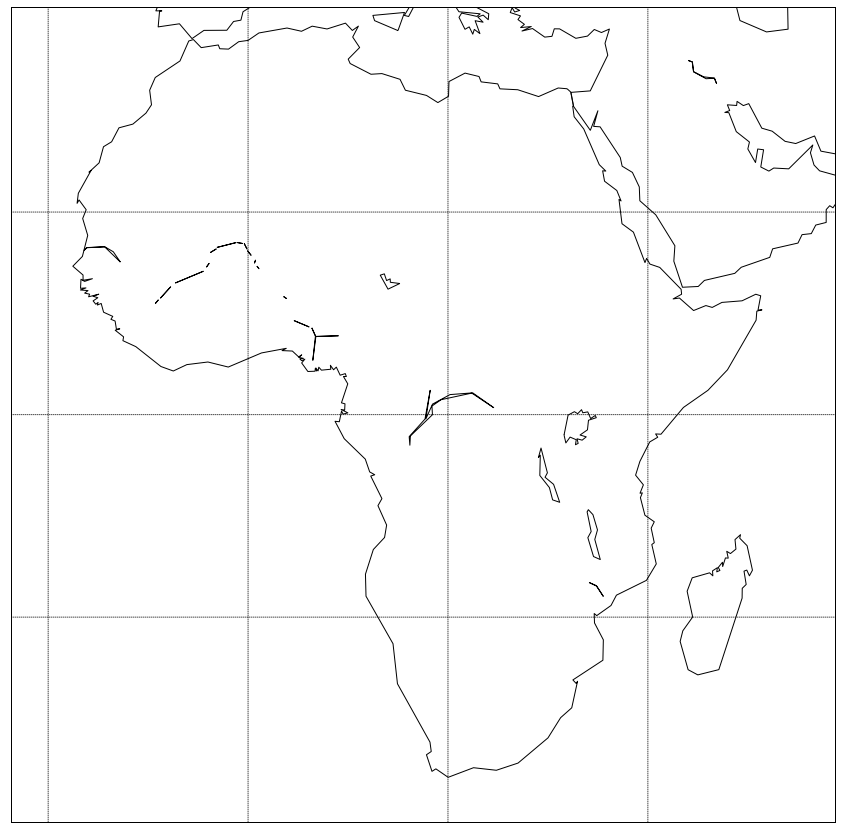

In [132]:
lon  = lon1
m=Basemap(projection='mill',lat_ts=0,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
#cs = m.contourf(x,y,deg,20)
#xx, yy = meshgrid(lon1_sst, lat_sst)
cs = m.pcolormesh(lon2, lat2, deg, cmap=plt.cm.Spectral_r)
#plt.title(' EOF {}'.format(pc), fontsize = 20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("ET EOF {}.png".format(pc))

In [205]:
df_list = []
for j in range(len(class_list_set)):
    df_list.append(pd.DataFrame(columns=df_sst.columns))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


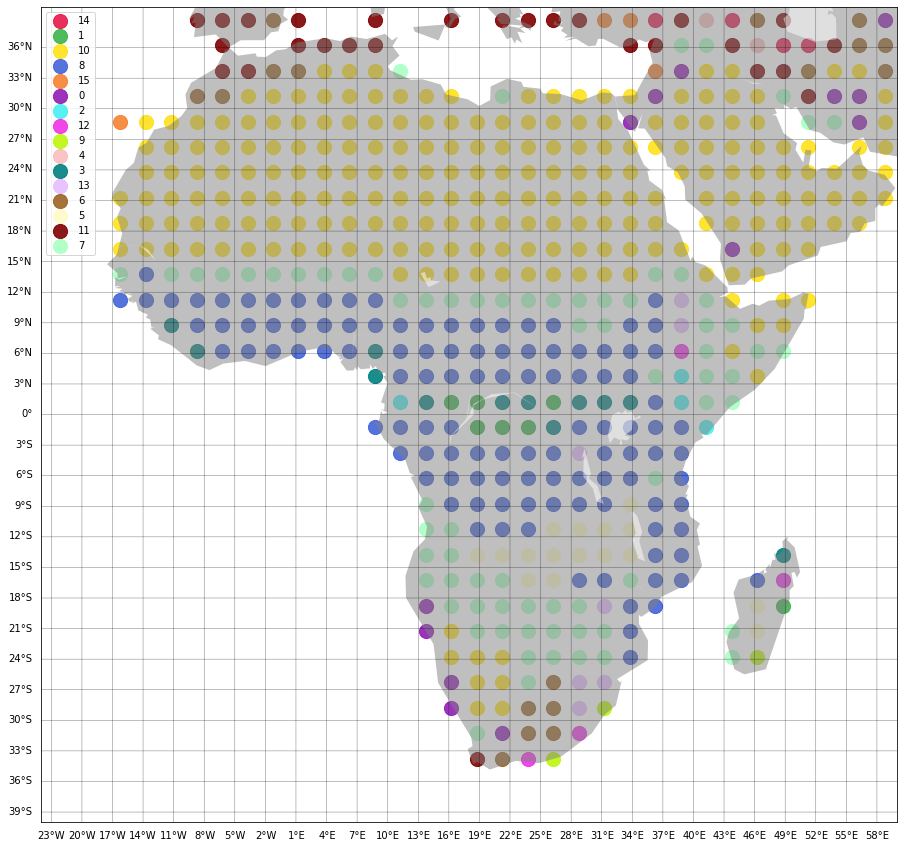

In [206]:
fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
'#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
#colors = pf.random_color(n_components_sst)

i = 0
for j in range(len(class_list_set)):
    Idx = np.where(class_list == str(j))[0]
    df_list[i] = df_sst.iloc[Idx,:]
    df_list[i]["values"] = j

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i, c = colors[i])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, set(class_list))
    i+=1

    
#plt.legend()
#plt.savefig("Climate_Classes.png")
plt.show()


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


NameError: name 'ax' is not defined

In [135]:
class_list

array(['0', '0', '0', '0', '0', '0', '5', '0', '0', '3', '3', '3', '16',
       '4', '3', '3', '3', '3', '3', '3', '4', '4', '0', '0', '0', '0',
       '3', '3', '3', '3', '3', '3', '16', '4', '11', '0', '0', '15', '0',
       '0', '13', '3', '3', '3', '3', '3', '3', '16', '4', '4', '11', '0',
       '15', '15', '15', '13', '3', '3', '3', '3', '3', '3', '16', '4',
       '4', '4', '0', '0', '15', '0', '15', '3', '3', '3', '3', '3', '3',
       '3', '16', '4', '4', '4', '0', '13', '0', '13', '3', '3', '3', '3',
       '3', '3', '3', '16', '4', '4', '4', '0', '15', '15', '13', '3',
       '3', '3', '3', '3', '3', '3', '16', '4', '4', '4', '0', '15', '3',
       '3', '3', '3', '3', '3', '3', '3', '16', '4', '4', '4', '15', '3',
       '3', '3', '3', '3', '3', '3', '3', '16', '4', '4', '4', '0', '0',
       '15', '15', '3', '3', '3', '3', '3', '3', '3', '3', '16', '4', '4',
       '11', '11', '0', '4', '0', '0', '0', '16', '3', '3', '3', '3', '3',
       '3', '3', '3', '16', '4', '4', '4',